# Cas13Hunter: Alignment and Conserved Region Analysis

## 0. Overview

This notebook performs multiple sequence alignment (MSA) on the cleaned viral genome sequences to analyse conserved regions. Conserved regions are critical for designing CRISPR-Cas13 guide RNAs. The MSA steps include:

1. __Load processed sequences from the `01_data_preprocessing.ipynb` output.__
2. __Perform MSA using the `MAFFT` tool.__
3. __Analyse conservation scores for each genome position.__
4. __Identify and highlight conserved regions.__
5. __Save the alignment and conservation data for downstream tasks.__


## 1. Setup

### Installing MAFFT

**MAFFT** (Multiple Alignment using Fast Fourier Transform) is an external tool used for multiple sequence alignment. While Biopython provides an interface (`MafftCommandline`) to run MAFFT from Python, the tool itself must be installed separately on your system.

__How to Install MAFFT:__

__1. **Linux**:__

Run the following command in your terminal:

```bash
sudo apt-get install mafft
```

__2. **macOS**:__

Use Homebrew to install MAFFT:

```bash
brew install mafft
```

__3. **Windows**:__

- Download the precompiled binaries from the [MAFFT official website](https://mafft.cbrc.jp/alignment/software/).
- Extract the binaries and add the MAFFT directory to your system's PATH variable.

__Verify Installation:__

- After installation, check that MAFFT is installed and accessible by running:

```bash
mafft --version
```

This should display the version number of MAFFT, confirming a successful installation. Once installed, MAFFT can be seamlessly used with Biopython’s `MafftCommandline` for sequence alignment in this notebook.

### Import Libraries

In [1]:
import os
from Bio import AlignIO
from Bio.Align.Applications import MafftCommandline
from Bio.Align import AlignInfo
import matplotlib.pyplot as plt
import numpy as np

## 2. Load Processed Sequences

In [2]:
# Define file paths
PROCESSED_DATA_DIR = "../data/processed/"
processed_file = os.path.join(PROCESSED_DATA_DIR, "cleaned_sequences.fasta")
aligned_file = os.path.join(PROCESSED_DATA_DIR, "aligned_sequences.fasta")

# Check if the processed file exists
if not os.path.exists(processed_file):
    raise FileNotFoundError(f"Processed file not found: {processed_file}")

# Load the processed sequences
print(f"Loading processed sequences from: {processed_file}")

Loading processed sequences from: ../data/processed/cleaned_sequences.fasta


## 3. Perform Multiple Sequence Alignment (MSA)

__What is Multiple Sequence Alignment (MSA)?__

- **Definition**: Multiple Sequence Alignment (MSA) is a method used to align three or more biological sequences (DNA, RNA, or protein) to identify regions of similarity. These similarities may be due to structural, functional, or evolutionary relationships.
- **Purpose in Viral Genomes**:
  - Align sequences to detect conserved regions that are critical for viral survival.
  - Identify variable regions, such as mutations, that may influence viral function or evolution.
- **How It Works**:
  - The sequences are arranged such that similar or identical bases are aligned in columns.
  - Gaps (`-`) may be introduced to account for insertions or deletions in some sequences.

__Why Use MSA in This Project?__

In this project, MSA helps:
1. Identify conserved RNA regions across the SARS-CoV-2 genome sequences.
2. Highlight regions suitable for CRISPR-Cas13 guide RNA design.
3. Provide insights into genome variability and evolution.

__Tool: `MAFFT`__
- `MAFFT` (Multiple Alignment using Fast Fourier Transform) is used for MSA.
- It is a widely used, efficient tool for aligning nucleotide or protein sequences.
- MAFFT handles large datasets effectively, making it suitable for our SARS-CoV-2 sequences.

__Process:__
1. MAFFT aligns the cleaned sequences from the `cleaned_sequences.fasta` file.
2. The alignment output is saved to `aligned_sequences.fasta`.
3. This alignment serves as the foundation for analyzing conservation across genome positions.

__How Long Will MAFFT Take for 500 Sequences?__

The runtime of `MAFFT` for aligning 500 sequences depends on several factors, including sequence length, the alignment mode, and the computational resources available.

__Factors Affecting Runtime:__

1. **Number of Sequences**:
   - The more sequences, the longer the runtime. For 500 sequences, MAFFT is manageable but may take noticeable time.
   
2. **Sequence Length**:
   - With sequences ~29,000 bases long (as in SARS-CoV-2), alignment takes longer due to increased complexity.

3. **MAFFT Algorithm**:
   - Default mode: Suitable for most cases but slower.
   - `FFT-NS-2`: Faster but less accurate.
   - `FFT-NS-i`: Balances speed and accuracy.
   - `PartTree`: Optimised for very large datasets.

4. **Computational Resources**:
   - Multi-threading: MAFFT can utilise multiple CPU cores to speed up alignment.
   - Available memory: Larger memory improves efficiency for longer sequences.

5. **Quality vs. Speed Trade-Off**:
   - Highly accurate alignment (e.g., iterative refinement) takes longer.

__Estimated Runtime:__

For **500 sequences** of ~29,000 bases:
- On a standard machine with 4 CPU cores and 8 GB of RAM:
  - **Default mode**: ~10–20 minutes.
  - **Faster modes (e.g., FFT-NS-2)**: ~2–5 minutes.
- Using an HPC or a machine with 16+ cores:
  - Runtime can drop to <1 minute in fast modes.

__Optimization Tips:__

1. **Choose an Appropriate Mode**:
   - For speed: Use `FFT-NS-2` or `PartTree`.
   - For balance: Use `FFT-NS-i`.
   Example Command:
   ```bash
   mafft --auto --thread 4 input.fasta > output.fasta
   ```
   
2. **Enable Multi-Threading:**
    - Use the --thread option to utilize all available CPU cores:
    Example Command:
    ```bash
    mafft --thread 8 input.fasta > output.fasta
    ```
3. **Pre-Clustering:**
    - Use tools like CD-HIT to cluster similar sequences and reduce redundancy before alignment.

4. **HPC or Cloud Resources:**
    - Using high-performance computing resources can significantly reduce runtime.

In [ ]:
# Perform multiple sequence alignment using MAFFT
mafft_cline = MafftCommandline(input=processed_file)
stdout, stderr = mafft_cline()

# Save the aligned sequences to a file
with open(aligned_file, "w") as f:
    f.write(stdout)

print(f"Aligned sequences saved to: {aligned_file}")


Find below the updated Python code to use `FFT-NS-2` mode with multi-threading for `MAFFT`:

1. **`auto=True:`**

    - Automatically determines the best alignment strategy based on dataset size, defaulting to FFT-NS-2 for speed with large sequences.

2. **Multi-threading:**

    - The thread argument specifies the number of CPU threads to use (e.g., thread=4 for 4 cores). Adjust based on your system.

3. **Error Handling:**

    - A FileNotFoundError ensures the input file exists before proceeding.

4. **Output:**

    - Saves the aligned sequences in aligned_sequences.fasta for further analysis.

Internally, this command runs a shell command like:
```bash
mafft --auto --thread 4 cleaned_sequences.fasta > aligned_sequences.fasta
```

In [3]:
from Bio.Align.Applications import MafftCommandline
import os

# Define file paths
PROCESSED_DATA_DIR = "../data/processed/"
processed_file = os.path.join(PROCESSED_DATA_DIR, "cleaned_sequences.fasta")
aligned_file = os.path.join(PROCESSED_DATA_DIR, "aligned_sequences.fasta")

# Check if the processed file exists
if not os.path.exists(processed_file):
    raise FileNotFoundError(f"Processed file not found: {processed_file}")

# Run MAFFT using FFT-NS-2 mode with multi-threading
print("Running MAFFT alignment using FFT-NS-2 mode...")
mafft_cline = MafftCommandline(
    input=processed_file,  # Input FASTA file
    thread=4,             # Number of CPU threads to use
    auto=True             # Automatically chooses FFT-NS-2 for speed
)
stdout, stderr = mafft_cline()

# Save the aligned sequences to a file
with open(aligned_file, "w") as f:
    f.write(stdout)

print(f"Aligned sequences saved to: {aligned_file}")

Running MAFFT alignment using FFT-NS-2 mode...
Aligned sequences saved to: ../data/processed/aligned_sequences.fasta


## 4. Analyse Conserved Regions

In this step, we calculate conservation scores across all aligned sequences to identify conserved regions. Conserved regions are critical for understanding viral evolution and for designing CRISPR-Cas13 guide RNAs.

__Steps:__

1. **Alignment Column Analysis**:
   - Each column in the multiple sequence alignment (MSA) corresponds to a specific position in the genome.
   - For each column, we calculate how many sequences share the most common nucleotide.

2. **Conservation Score**:
   - A conservation score is calculated as:
     $\text{Conservation Score} = \frac{\text{Count of Most Common Nucleotide}}{\text{Total Number of Sequences}}$
   - This score ranges from `0` (completely variable) to `1` (completely conserved).

3. **Threshold for Conservation**:
   - Positions with a conservation score above a certain threshold (e.g., 90%) are considered conserved.

__Importance:__

- **Identify Critical Regions**: Conserved regions are likely to be functionally important for the virus, such as binding sites or replication machinery.
- **CRISPR-Cas13 Design**: These regions are ideal targets for guide RNA design, as they are consistent across viral variants.

__Output:__

- Conservation scores for each genome position.
- A list of conserved positions that meet the defined threshold (e.g., >90% conserved).

In [4]:
# Load the aligned sequences
alignment = AlignIO.read(aligned_file, "fasta")
print(f"Alignment loaded with {len(alignment)} sequences.")

# Calculate conservation scores
alignment_length = alignment.get_alignment_length()
conservation_scores = []

for i in range(alignment_length):
    column = alignment[:, i]
    most_common = max(set(column), key=column.count)
    conservation_score = column.count(most_common) / len(column)
    conservation_scores.append(conservation_score)

# Identify conserved regions (threshold: 90% conserved)
threshold = 0.9
conserved_positions = [
    i for i, score in enumerate(conservation_scores) if score >= threshold
]
print(f"Number of conserved positions: {len(conserved_positions)}")


Alignment loaded with 453 sequences.
Number of conserved positions: 35119


## 5. Visualise Conservation

This step generates a plot to visualise conservation scores across all positions in the aligned sequences. The visualisation helps to identify conserved and variable regions in the viral genome.

__Steps:__
1. **Conservation Score Plot**:
   - Each genome position is represented on the x-axis.
   - The conservation score for each position is plotted on the y-axis, ranging from `0` (completely variable) to `1` (completely conserved).

2. **Threshold Line**:
   - A horizontal line is added to indicate the conservation threshold (e.g., 90%).
   - Positions above this threshold are considered conserved.

__Importance:__
- **Identify Conserved Regions**: Peaks above the threshold highlight regions with high conservation, which are likely functionally important.
- **Spot Variable Regions**: Valleys in the plot represent positions with high variability, often due to mutations or evolutionary adaptations.
- **Guide RNA Design**: Helps to visually identify regions suitable for targeting with CRISPR-Cas13 guide RNAs.

__Output:__
- A clear, informative plot showing conservation scores across the genome, with conserved regions highlighted by their high scores.


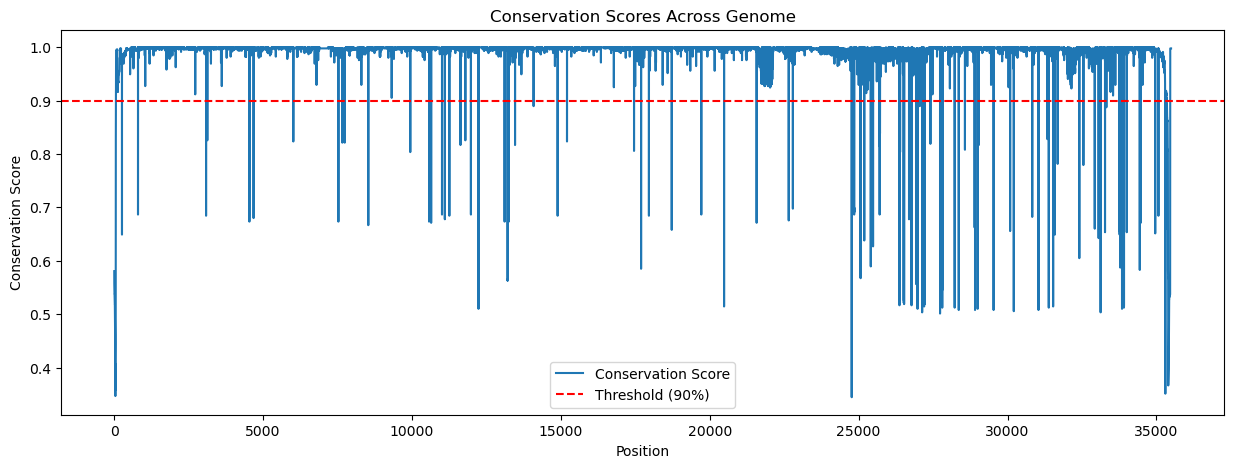

In [5]:
# Plot conservation scores
plt.figure(figsize=(15, 5))
plt.plot(range(alignment_length), conservation_scores, label="Conservation Score")
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold ({threshold*100:.0f}%)")
plt.title("Conservation Scores Across Genome")
plt.xlabel("Position")
plt.ylabel("Conservation Score")
plt.legend()
plt.show()


## 6. Save Results

This step saves the identified conserved positions and their data to a file for future use in downstream analyses.

__Steps__
1. **Save Conserved Positions**:
   - The positions in the alignment that meet the conservation threshold (e.g., >90% conserved) are stored in a file.
   - The data is saved in a NumPy array format (`.npy`), which is efficient for storage and quick to load in future scripts or notebooks.

2. **File Location**:
   - The conserved positions are saved to the `conserved_regions.npy` file in the `processed` data directory.

__Importance:__
- **Reproducibility**: Storing conserved positions ensures the results can be reused without rerunning the entire alignment and analysis pipeline.
- **Integration with Other Steps**: The conserved regions can be directly used in downstream processes like CRISPR-Cas13 guide RNA design.

__Output:__
- A file containing the indices of conserved positions, ready for use in the next stages of the workflow.


In [ ]:
# Save conserved region data
conserved_file = os.path.join(PROCESSED_DATA_DIR, "conserved_regions.npy")
np.save(conserved_file, conserved_positions)
print(f"Conserved positions saved to: {conserved_file}")
